In [98]:
#%matplotlib widget

In [99]:
import pandas as pd
import numpy as np
import nltk
import string
import regex as re
import contractions
from collections import Counter
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

In [100]:
fake_news_df = pd.read_csv("clean_output.csv")
fake_news_df.head()

,Unnamed: 0,cleaned_title,cleaned_text,target
0,0,smell hillarys fear,daniel greenfield shillman journalism fellow f...,1
1,1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,1
2,2,kerry go paris gesture sympathy,yous secretary state john f kerry said monday ...,0
3,3,bernie supporters twitter erupt anger dnc trie...,kaydee king kaydeeking november 9 2016 lesson ...,1
4,4,battle new york primary matters,primary day new york frontrunners hillary clin...,0


In [101]:
fake_news_df.dropna(inplace=True)
fake_news_df.reset_index(drop=True, inplace=True)
fake_news_df.drop(columns='Unnamed: 0',inplace=True)

In [102]:
fake_news_df.dtypes

cleaned_title    object
cleaned_text     object
target            int64
dtype: object

In [103]:
len(fake_news_df)

6298

In [104]:
Counter(fake_news_df['cleaned_text'][0].split()).most_common(10)

[('fbi', 29),
 ('clinton', 16),
 ('hillary', 14),
 ('comey', 10),
 ('investigation', 7),
 ('campaign', 6),
 ('fear', 6),
 ('war', 5),
 ('people', 5),
 ('time', 5)]

In [105]:
real_word_list = []
fake_word_list = []
for i in range(0,len(fake_news_df)):
    if fake_news_df['target'][i] == 0:
        real_word_list.extend(fake_news_df['cleaned_text'][i].split())
    elif fake_news_df['target'][i] == 1:
        fake_word_list.extend(fake_news_df['cleaned_text'][i].split())

print(len(real_word_list))
print(len(fake_word_list))

1557345
1196044


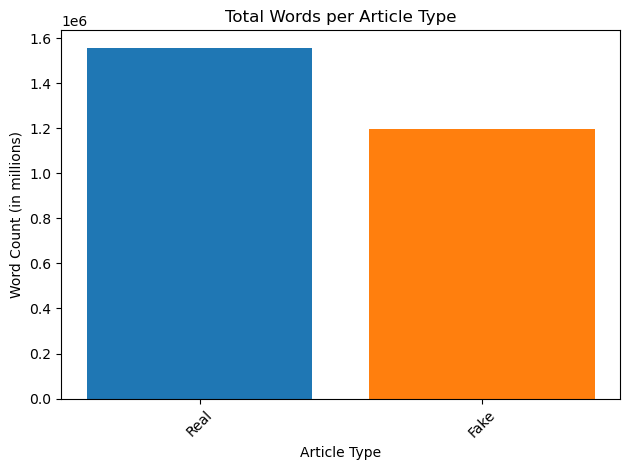

In [106]:
total_words = [len(real_word_list),len(fake_word_list)]
word_labels = ["Real","Fake"]
plt.bar(word_labels[0], total_words[0], align="center")
plt.bar(word_labels[1], total_words[1], align="center")
plt.xticks(rotation=45)
plt.xlabel('Article Type')
plt.ylabel('Word Count (in millions)')
plt.title('Total Words per Article Type')
plt.tight_layout()
plt.savefig('total_split_word_count.png')

In [107]:
real_article_length = []
fake_article_length = []
for i in range(0,len(fake_news_df)):
    if fake_news_df['target'][i] == 0:
        real_article_length.append(len(fake_news_df['cleaned_text'][i].split()))
    elif fake_news_df['target'][i] == 1:
        fake_article_length.append(len(fake_news_df['cleaned_text'][i].split()))

print(len(real_article_length))
print(len(fake_article_length))


3171
3127


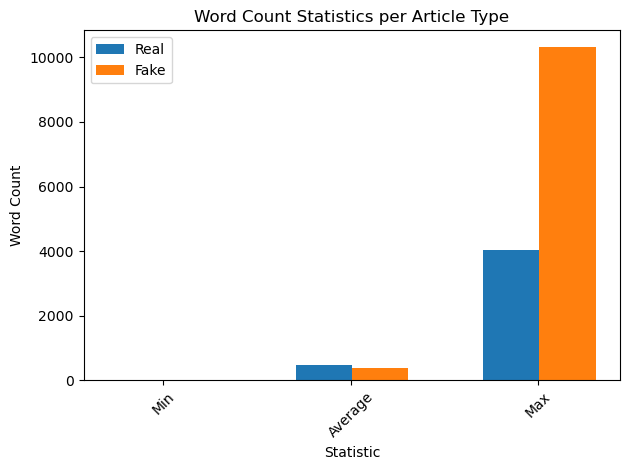

In [108]:
real_stats = [min(real_article_length), round(mean(real_article_length)), max(real_article_length)]
fake_stats = [min(fake_article_length), round(mean(fake_article_length)), max(fake_article_length)]
stats_labels = ["Min","Average","Max"]
X_axis = np.arange(len(stats_labels))

plt.bar(X_axis - 0.145, real_stats, align="center", width = 0.3, label="Real")
plt.bar(X_axis + 0.155, fake_stats, align="center", width = 0.3, label="Fake")
plt.xticks(X_axis, stats_labels, rotation=45)
plt.xlabel('Statistic')
plt.ylabel('Word Count')
plt.title('Word Count Statistics per Article Type')
plt.tight_layout()
plt.legend()
plt.savefig('word_count_stats.png')

In [109]:
real_count = Counter(real_word_list).most_common(15)
fake_count = Counter(fake_word_list).most_common(15)
print(real_count)
print(fake_count)

[('said', 17187), ('trump', 12693), ('would', 8994), ('clinton', 8769), ('one', 6314), ('people', 6156), ('new', 5772), ('president', 5684), ('state', 5569), ('campaign', 5374), ('also', 5028), ('republican', 4857), ('obama', 4663), ('states', 4325), ('could', 4316)]
[('trump', 5731), ('clinton', 5653), ('would', 5519), ('us', 5207), ('people', 5201), ('one', 4893), ('hillary', 4149), ('said', 3992), ('new', 3496), ('like', 3220), ('also', 3189), ('election', 2986), ('even', 2896), ('world', 2860), ('time', 2848)]


In [110]:
real_x = []
real_y = []
fake_x = []
fake_y = []
for i in range(0,len(real_count)):
    real_x.append(real_count[i][0])
    real_y.append(real_count[i][1])
for i in range(0,len(fake_count)):
    fake_x.append(fake_count[i][0])
    fake_y.append(fake_count[i][1])

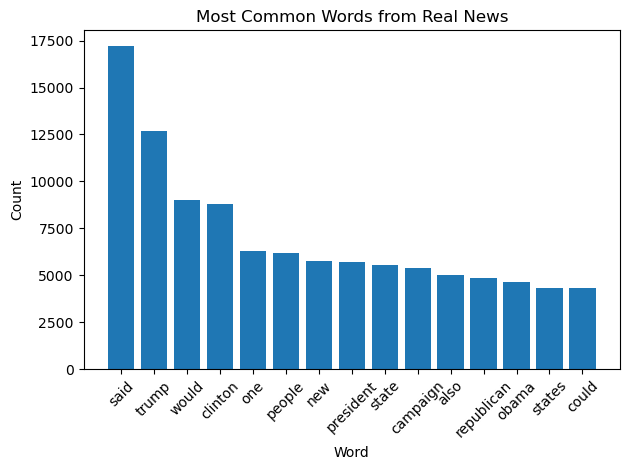

In [111]:
plt.bar(real_x, real_y, align="center")
plt.xticks(rotation=45)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Common Words from Real News')
plt.tight_layout()
plt.savefig('real_news_word_count.png')

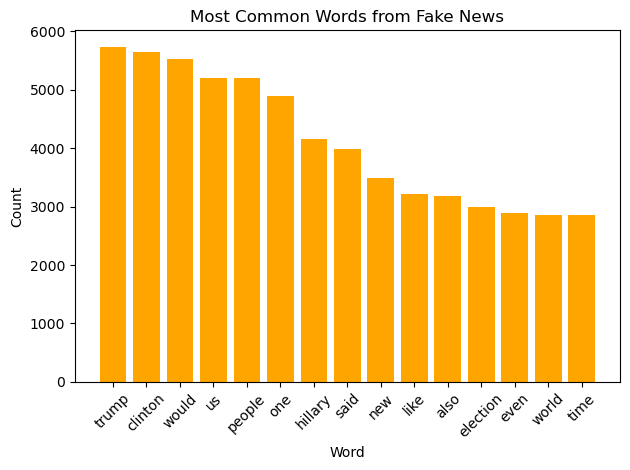

In [112]:
plt.bar(fake_x, fake_y, align="center", color='orange')
plt.xticks(rotation=45)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Common Words from Fake News')
plt.tight_layout()
plt.savefig('fake_news_word_count.png')